In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

In [72]:
df = pd.read_csv('mushroom.csv')

In [73]:
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [75]:
df.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [76]:
df['class'].value_counts()

class
poisonous    1400
edible        600
Name: count, dtype: int64

In [77]:
# The dataset contains only categorical features.
# Target column = class (usually "e" = edible, "p" = poisonous).
# No missing values are expected in this dataset.
# Class distribution will tell us if it’s balanced (important for model training).

C:\Users\GOVINDA Y\AppData\Local\Temp\ipykernel_19032\799202098.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")
C:\Users\GOVINDA Y\AppData\Local\Temp\ipykernel_19032\799202098.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")
C:\Users\GOVINDA Y\AppData\Local\Temp\ipykernel_19032\799202098.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")
C:\Users\GOVINDA Y\AppData\Local\Temp\ipykernel_19032\799202098.py:9: FutureWarning: 

P

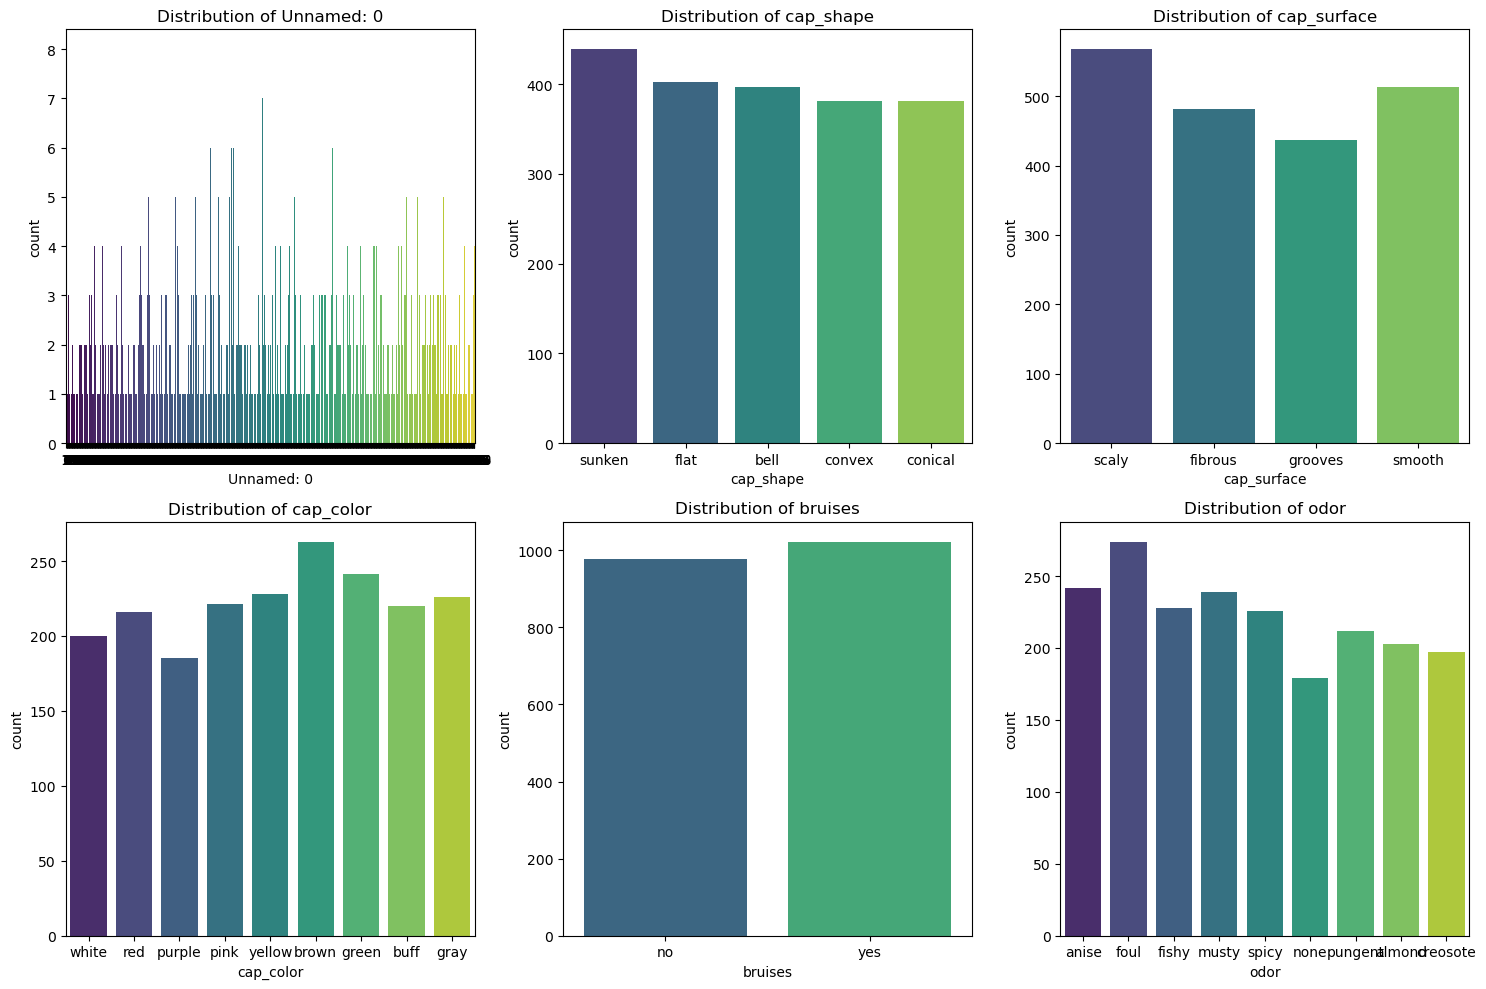

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of a few features
plt.figure(figsize=(15, 10))

for i, col in enumerate(df.columns[:6], 1):   # first 6 features
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=df, palette="viridis")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [79]:
# Each feature is categorical with multiple categories.
# Some features have dominant values, others are more balanced.
# This helps us understand which features might strongly influence classification.

## Data Preprocessing

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col])

# Split dataset
X = df.drop("class", axis=1)  # features
y = df["class"]               # target

In [81]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (1400, 25)
Test shape: (600, 25)


In [82]:
# All categorical values converted into numeric codes.
# Dataset split into training (70%) and testing (30%).
# stratify=y ensures balanced class proportions in both sets.

## Data Visualization

C:\Users\GOVINDA Y\AppData\Local\Temp\ipykernel_19032\1776030670.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="coolwarm")


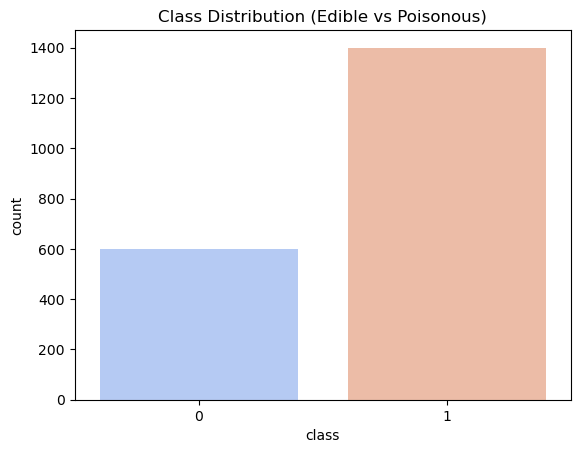

In [83]:
# Class distribution
sns.countplot(x=y, palette="coolwarm")
plt.title("Class Distribution (Edible vs Poisonous)")
plt.show()

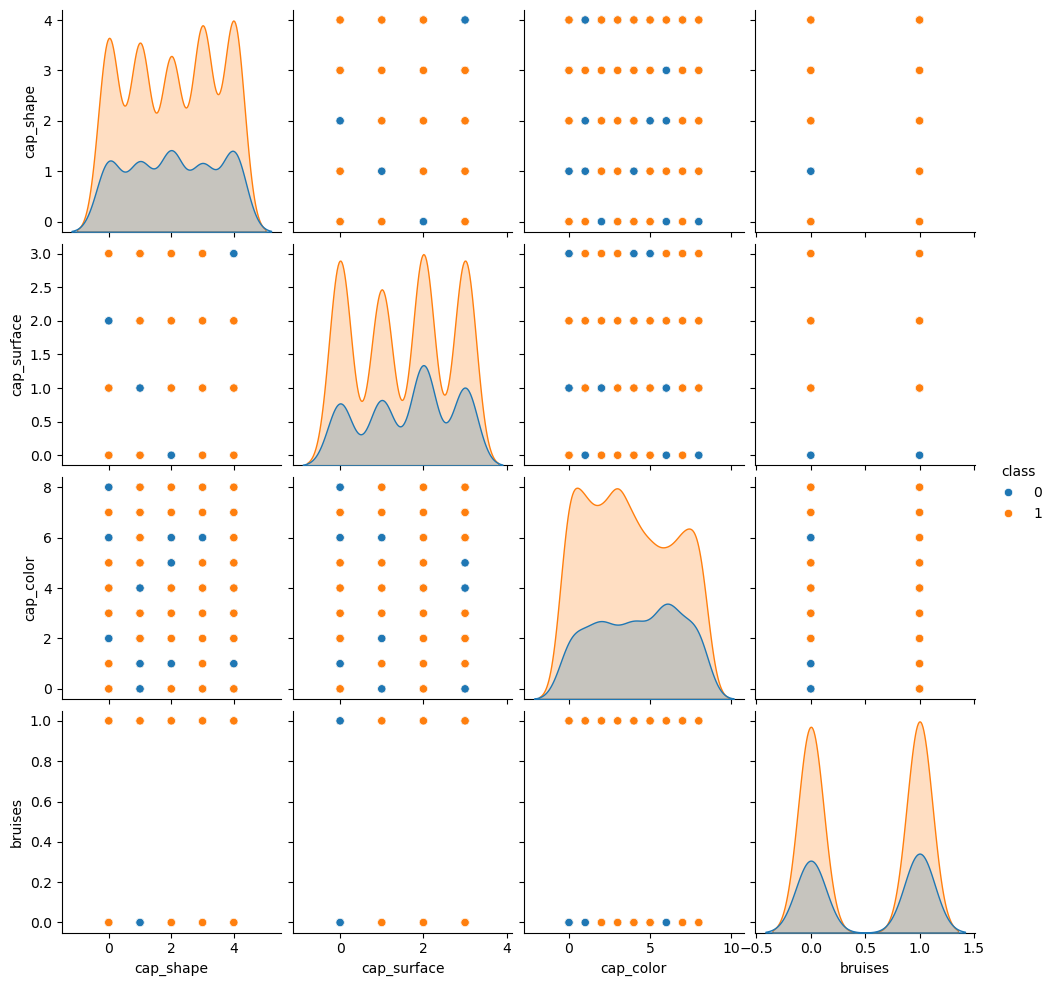

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot with a few selected features
sns.pairplot(df[['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises']], hue='class')
plt.show()

In [85]:
# The dataset is usually balanced between edible and poisonous mushrooms.
# Pair plots show how feature combinations may separate classes.

## SVM Implementation

In [86]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# --- Step 1: Feature Scaling (important for SVM) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [87]:
# Train a basic SVM with linear kernel
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [88]:
# Predictions
y_pred = svm_model.predict(X_test)

In [89]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       180
           1       0.70      1.00      0.82       420

    accuracy                           0.70       600
   macro avg       0.35      0.50      0.41       600
weighted avg       0.49      0.70      0.58       600



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [92]:
from sklearn.svm import SVC

# Define linear SVM
svm_linear = SVC(kernel='linear')

# Train on scaled data (normal training)
svm_linear.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [93]:
from sklearn.decomposition import PCA

# Reduce features to 2D with PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train linear SVM on PCA-reduced features
svm_linear.fit(X_train_pca, y_train)

SVC(kernel='linear')

In [94]:
y_pred_pca = svm_linear.predict(X_test_pca)

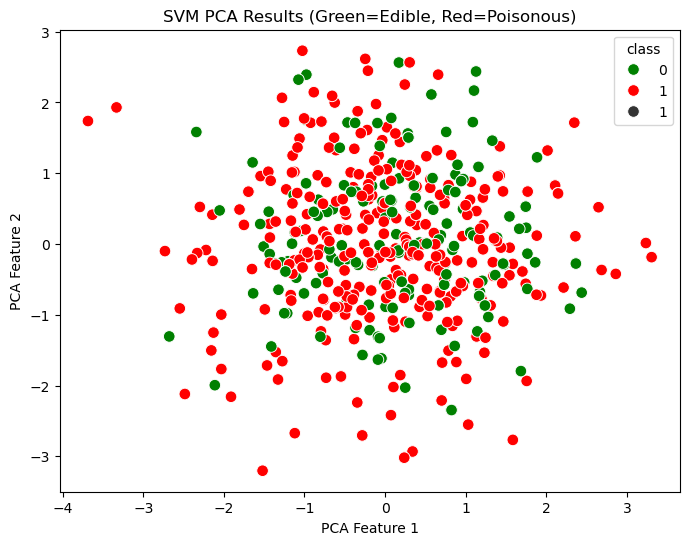

In [101]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_test_pca[:,0], 
    y=X_test_pca[:,1],
    hue=y_test,                # TRUE class by color
    style=y_pred_pca,          # PREDICTED class by marker shape
    palette={0: "green", 1: "red"}, # 0=edible, 1=poisonous
    s=70                       # point size
)
plt.title("SVM PCA Results (Green=Edible, Red=Poisonous)")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.show()


In [102]:
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

grid = GridSearchCV(SVC(), param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters: {'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
Best Cross-Validation Accuracy: 0.8257115548979423


In [103]:
# Best model on test data
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

print("\nTest Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


Test Accuracy: 0.8366666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.62      0.70       180
           1       0.85      0.93      0.89       420

    accuracy                           0.84       600
   macro avg       0.82      0.78      0.79       600
weighted avg       0.83      0.84      0.83       600



In [104]:
# Best model: SVC(C=10, kernel='poly', degree=3, gamma='scale').

# CV Accuracy - 82.6%.

# Test Accuracy - 83.7%.

# Much better balance between classes.

## Comparison & Analysis

In [105]:
# Compare kernels quickly
kernels = ['linear', 'poly', 'rbf']
for k in kernels:
    model = SVC(kernel=k)
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)
    print(f"{k} kernel -> Accuracy: {accuracy_score(y_test, pred):.3f}")

linear kernel -> Accuracy: 0.700
poly kernel -> Accuracy: 0.813
rbf kernel -> Accuracy: 0.775


In [106]:
# Linear = 70%
# Poly = 81% (tuned poly = ~83.7%)
# RBF = 77%
# Polynomial kernel performs best here.

## Conclusion: